<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [7]:
df = pd.read_csv("adult_eda.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.shape

(32561, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,31759.0,10.082843,2.576172,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [13]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [41]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [17]:
object_col = df.select_dtypes(include="object").columns
object_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [18]:
for col in object_col:
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna=False))
    print("--"*10)



workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [20]:
df[df.isin(["?"])].any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [22]:
df["workclass"].value_counts(dropna=False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [23]:
df.workclass.replace("?", "Unknown", inplace=True)

In [27]:
df.workclass.value_counts(dropna=False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [30]:
df.occupation.replace("?", "Unknown", inplace=True)


In [31]:
df.occupation.value_counts(dropna=False)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
df['native-country'].replace("?", "Unknown", inplace = True)

In [35]:
df['native-country'].value_counts(dropna=False)

United-States                 29170
Mexico                          643
Unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [36]:
#df replace({"?": "Unknown"})

---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [37]:
df.groupby('education')['education-num'].value_counts(dropna=False)

education     education-num
10th          6.0                916
              NaN                 17
11th          7.0               1146
              NaN                 29
12th          8.0                424
              NaN                  9
1st-4th       2.0                161
              NaN                  7
5th-6th       3.0                330
              NaN                  3
7th-8th       4.0                631
              NaN                 15
9th           5.0                503
              NaN                 11
Assoc-acdm    12.0              1044
              NaN                 23
Assoc-voc     11.0              1343
              NaN                 39
Bachelors     13.0              5247
              NaN                108
Doctorate     16.0               405
              NaN                  8
HS-grad       9.0              10215
              NaN                286
Masters       14.0              1687
              NaN                 36
Preschool 

In [38]:
df.drop("education-num", axis=1, inplace=True)

In [39]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [ ]:
#Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?


In [40]:
df.relationship.value_counts(dropna=False)

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [49]:
df.relationship.replace(np.nan, "None", inplace=True)

In [50]:
df['marital-status'].value_counts(dropna=False)


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [51]:
df.groupby('relationship')['marital-status'].value_counts(dropna=False)

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
None            Never-married             4485
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowed                     15
                Married-AF-spouse            1
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Marrie

In [55]:
df.relationship.replace("None", np.nan, inplace=True)

In [57]:
df.relationship.replace([np.nan, 'Not-in-family', 'Other-relative'], 'Unmarried', inplace=True)


In [58]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [59]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [60]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [61]:
df.salary.value_counts(dropna=False)

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [62]:
df.salary.map({'<=50K' : 0, '>50K' : 1 })

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [63]:
df["salary_num"] = df.salary.map({'<=50K' : 0, '>50K' : 1 })


In [64]:
df.salary_num.value_counts(dropna=False)

0    24720
1     7841
Name: salary_num, dtype: int64

In [65]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary_num
age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.009463
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000,0.229689
salary_num,0.234037,-0.009463,0.223329,0.150526,0.229689,1.000000


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
salary_num,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


In [ ]:
#age


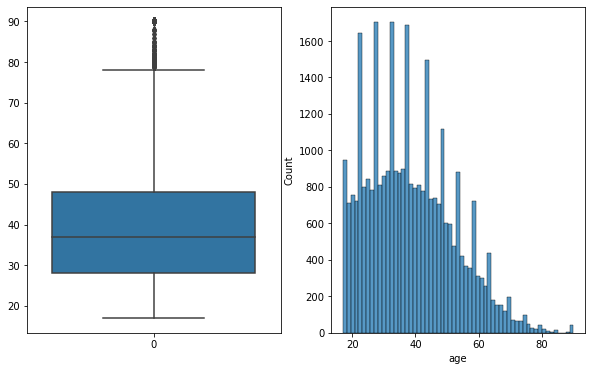

In [67]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df.age)
plt.subplot(1,2,2)
sns.histplot(data=df.age);

In [68]:
low = df.age.quantile(0.25)
high = df.age.quantile(0.75)
IQR = high - low
low, high, IQR

(28.0, 48.0, 20.0)

In [70]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(-2.0, 78.0)

In [72]:
df[df['age'] > 78]["age"].value_counts()

90    43
79    22
80    22
81    20
82    12
84    10
83     6
85     3
88     3
86     1
87     1
Name: age, dtype: int64

In [76]:
df[df['age']>78].sort_values(by='age', ascending = False)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
12451,90,Unknown,225063,Some-college,Never-married,Unknown,Unmarried,Asian-Pac-Islander,Male,0,0,10,South,<=50K,0
10545,90,Private,175491,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K,1
5406,90,Private,51744,Masters,Never-married,Exec-managerial,Unmarried,Black,Male,0,0,50,United-States,>50K,1
19747,90,Private,226968,7th-8th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0
28463,90,Federal-gov,195433,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17609,79,Self-emp-inc,97082,12th,Widowed,Sales,Unmarried,White,Male,18481,0,45,United-States,>50K,1
20483,79,Local-gov,146244,Doctorate,Widowed,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K,0
18141,79,Self-emp-not-inc,84979,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,>50K,1
19828,79,Private,172220,7th-8th,Widowed,Priv-house-serv,Unmarried,White,Female,2964,0,30,United-States,<=50K,0


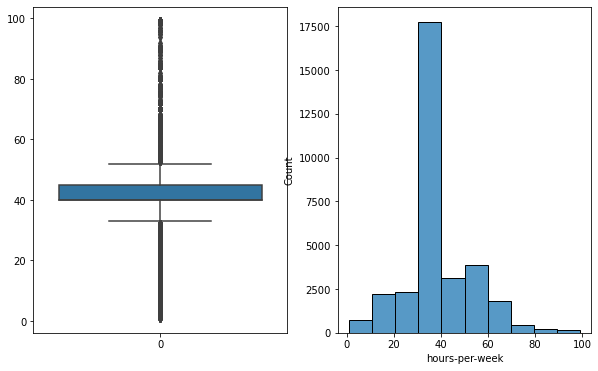

In [77]:
#hours_per_week
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df["hours-per-week"])
plt.subplot(1,2,2)
sns.histplot(data=df["hours-per-week"], bins=10);

In [78]:
low = df["hours-per-week"].quantile(0.25)
high = df["hours-per-week"].quantile(0.75)
IQR = high - low
low, high, IQR

(40.0, 45.0, 5.0)

In [79]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(32.5, 52.5)

In [80]:
df[df["hours-per-week"] > 52.5]["hours-per-week"].value_counts().sort_index(ascending=False)

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
64      14
63      10
62      18
61       2
60    1475
59       5
58      28
57      17
56      97
55     694
54      41
53      25
Name: hours-per-week, dtype: int64

In [81]:
df[df["hours-per-week"] > 52.5].sort_values(by='hours-per-week', ascending = False)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
25986,44,Local-gov,212665,Some-college,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,99,United-States,<=50K,0
23179,31,Private,511289,HS-grad,Never-married,Farming-fishing,Unmarried,White,Male,2907,0,99,United-States,<=50K,0
13558,38,Private,191103,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K,1
9831,67,Private,35015,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,99,United-States,<=50K,0
13580,38,Self-emp-not-inc,112158,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23,Private,181820,HS-grad,Separated,Craft-repair,Unmarried,White,Male,0,0,53,United-States,<=50K,0
28858,62,Private,123411,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,53,United-States,<=50K,0
15889,43,Federal-gov,155106,Bachelors,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,53,United-States,<=50K,0
15908,22,Local-gov,163205,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,53,United-States,<=50K,0


In [82]:
df.groupby("workclass")["hours-per-week"].mean()

workclass
Federal-gov         41.379167
Local-gov           40.982800
Never-worked        28.428571
Private             40.267096
Self-emp-inc        48.818100
Self-emp-not-inc    44.421881
State-gov           39.031587
Unknown             31.919390
Without-pay         32.714286
Name: hours-per-week, dtype: float64

In [84]:
df[df["hours-per-week"] == 99].groupby("workclass")["hours-per-week"].count()

workclass
Federal-gov          1
Local-gov            4
Private             44
Self-emp-inc         9
Self-emp-not-inc    21
State-gov            1
Unknown              5
Name: hours-per-week, dtype: int64

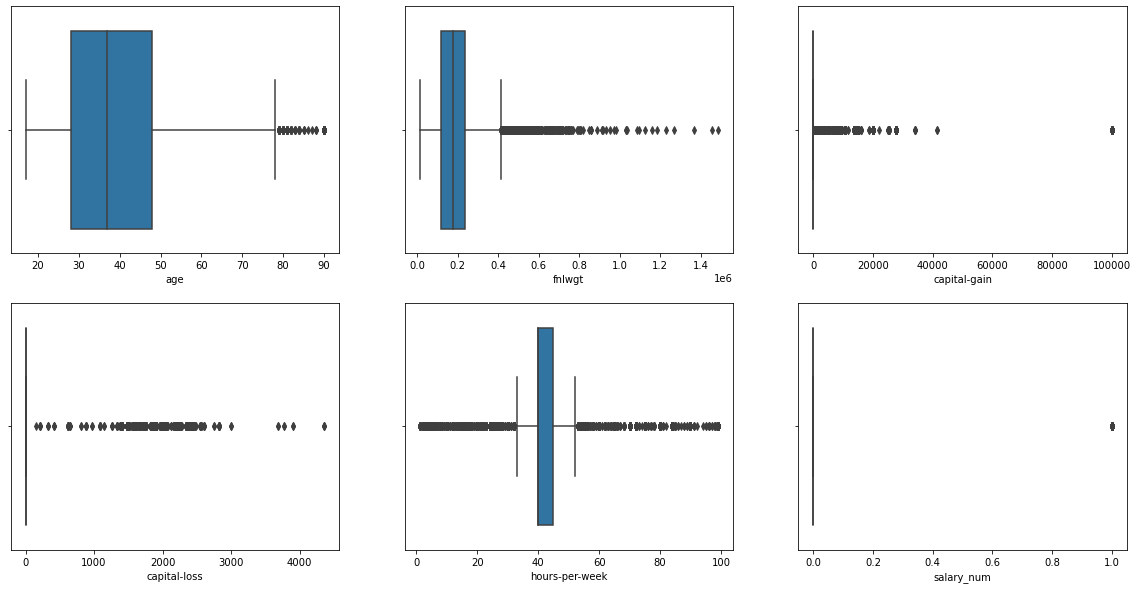

In [85]:
index = 0
plt.figure(figsize=(20,10))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature, data=df, whis=1.5)

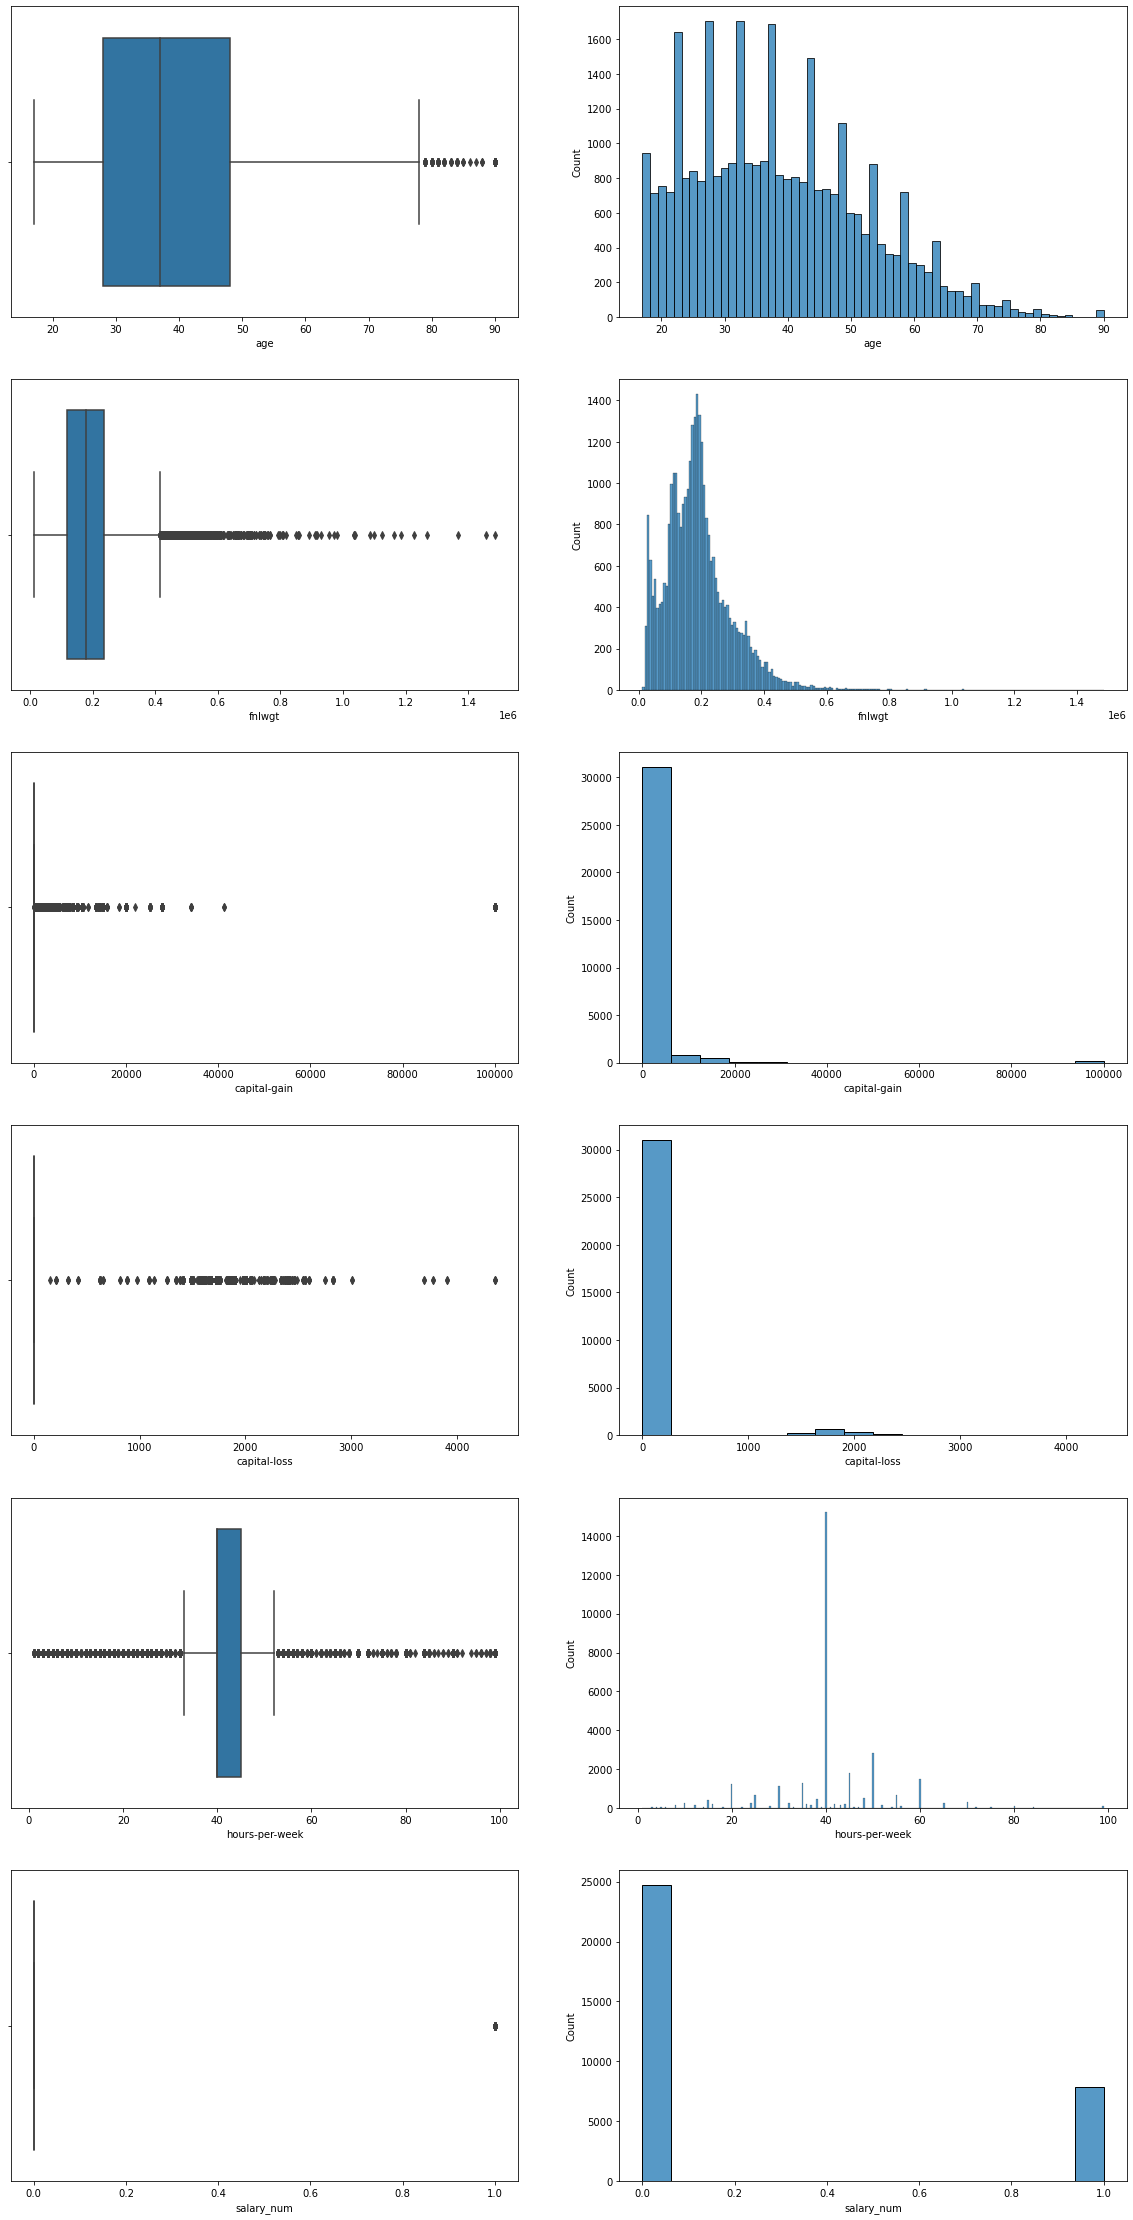

In [87]:
index = 0
plt.figure(figsize=(20,40))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(6,2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(6,2,index)
    sns.histplot(x=feature, data=df)

# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [88]:
df[(df['age'] >78) & (df['hours-per-week'] > 52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,<=50K,0
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K,1
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,<=50K,0
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,<=50K,0
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K,1
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K,0
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K,1


In [89]:
drop_index = df[(df["age"] > 78) & (df['hours-per-week'] > 52.5)].index
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [90]:
df.drop(index=drop_index, inplace=True)

In [91]:
df[(df['age'] >78) & (df['hours-per-week'] > 52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num


---
# How many of each race are represented in this dataset?
---

In [136]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot:>

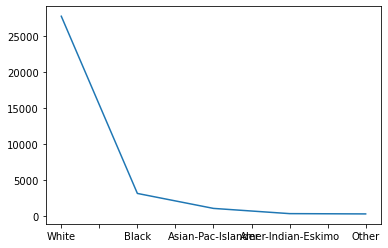

In [92]:
df["race"].value_counts().plot()

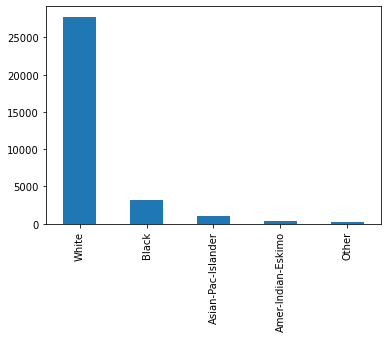

In [96]:
df["race"].value_counts().plot.bar();

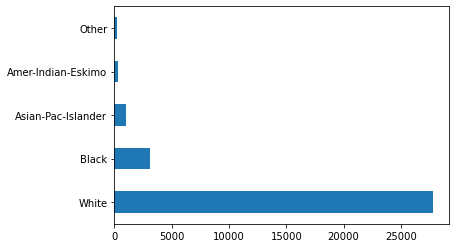

In [97]:
df["race"].value_counts().plot.barh();

---
# What is the average age of men/women?
---

In [105]:
a = df.loc[df.sex == 'Male', 'age'].mean()

In [103]:
#df[df.sex =='Male']['age'].mean()

39.41444378127726

In [108]:
round(a,2)

39.41

In [46]:
round(average_age_men,1)

39.4

<AxesSubplot:>

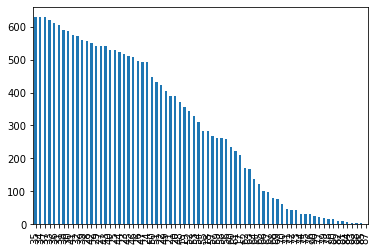

In [111]:
df.loc[df.sex == 'Male', 'age'].value_counts().plot.bar()

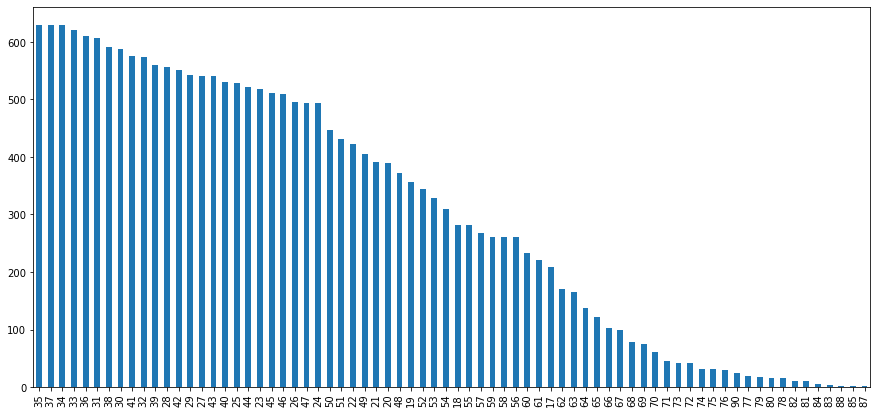

In [50]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [117]:
a = df.loc[df.sex == 'Female', 'age'].mean()
b

36.85823043357163

<AxesSubplot:>

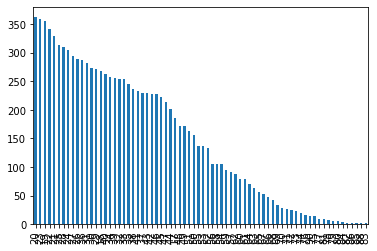

In [120]:
df.loc[df.sex == 'Female', 'age'].value_counts().plot.bar()

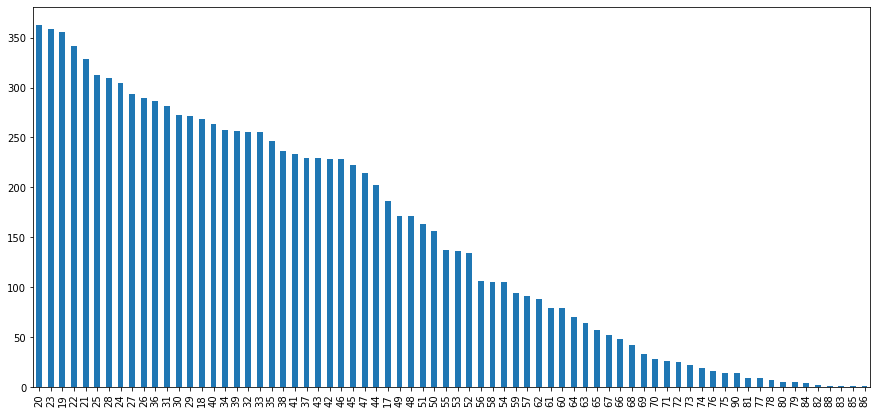

---
# What is the percentage of people who have a Bachelor's degree?
---

In [211]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

In [123]:
bachelors = df["education"].value_counts().loc["Bachelors"]

In [124]:
total = len(df)

In [125]:
percentage_bachelors = bachelors / total * 100

percentage_bachelors

16.44445809781273

In [128]:
df["education"].value_counts(normalize=True).loc["Bachelors"]*100

16.44445809781273

In [129]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [130]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [137]:
df.education.isin(['Bachelors', 'Masters', 'Doctorate'])

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [138]:
(df["education"] == "Bachelors") | (df["education"] == "Masters")| (df["education"] == "Doctorate")

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [139]:
df.salary == ">50K"  

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: salary, Length: 32552, dtype: bool

In [140]:
df[(df.education.isin(['Bachelors', 'Masters', 'Doctorate'])) & (df.salary == ">50K"  )]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,1
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,1
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K,1
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1


In [143]:
len(df[(df.education.isin(['Bachelors', 'Masters', 'Doctorate'])) & (df.salary == ">50K"  )])

3484

In [144]:
high_edu_high_sal = len(df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary=='>50K')])
total = df.shape[0]

In [145]:
perc_high_edu = high_edu_high_sal/total
perc_high_edu

0.10702875399361023

In [146]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.7


---
# What percentage of people without advanced education make more than 50K?
---

In [259]:
lower_education = df_high_edu = df[(df["education"] != "Bachelors") & (df["education"] != "Masters") & (df["education"] != "Doctorate")]
lower_education

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [266]:
perc_low_edu= df_high_edu = df[((df["education"] != "Bachelors") & (df["education"] != "Masters") & (df["education"] != "Doctorate"))  & (df["salary"] == ">50K")] 
perc_low_edu

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,NaN,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,NaN,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [268]:
count = len(perc_low_edu)
count

4355

In [79]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.38


In [80]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [150]:

lazy_riches=(df["salary"] == ">50K") & (df["hours-per-week"]== df["hours-per-week"].min())
lazy_riches 

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [151]:
df[lazy_riches]


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K,1
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K,1


In [153]:
num_lazy_riches = len(df[lazy_riches])
num_lazy_riches 

2

In [331]:
num_min_workers = (df["hours-per-week"] == df["hours-per-week"].min()).sum()
num_min_workers 

20

In [85]:
num_min_workers = 
num_min_workers

20

In [86]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [157]:
country_salary_df = df.groupby('native-country')[["salary"]].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [158]:
df.groupby('native-country')[["salary"]].count()

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [161]:
country_salary_df_riches = df[df.salary == '>50K'].groupby('native-country')[["salary"]].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [165]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values(by="salary", ascending=False)
rich_per_country 

,salary
native-country,
Iran,0.418605
France,0.413793
India,0.400000
Taiwan,0.392157
Japan,0.387097
Yugoslavia,0.375000
Cambodia,0.368421
Italy,0.342466
England,0.333333


In [166]:
rich_per_country.loc[rich_per_country.salary == rich_per_country.salary.max()]

,salary
native-country,
Iran,0.418605


In [167]:
rich_per_country.loc[[rich_per_country.salary.idxmax()]]

,salary
native-country,
Iran,0.418605


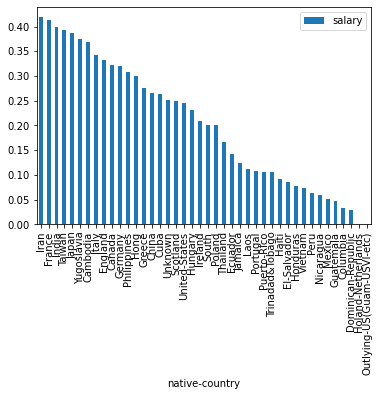

In [168]:
rich_per_country.plot.bar();

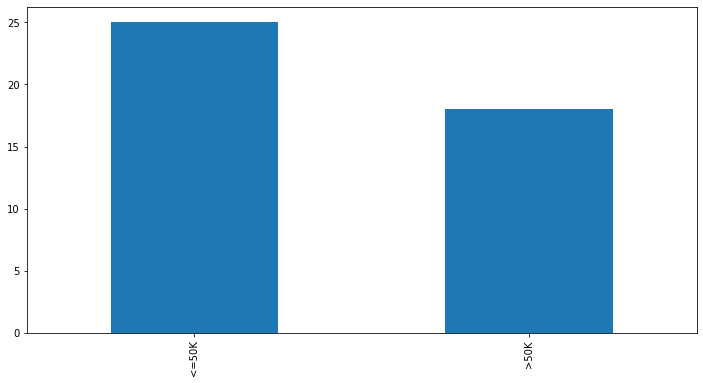

In [169]:


plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();



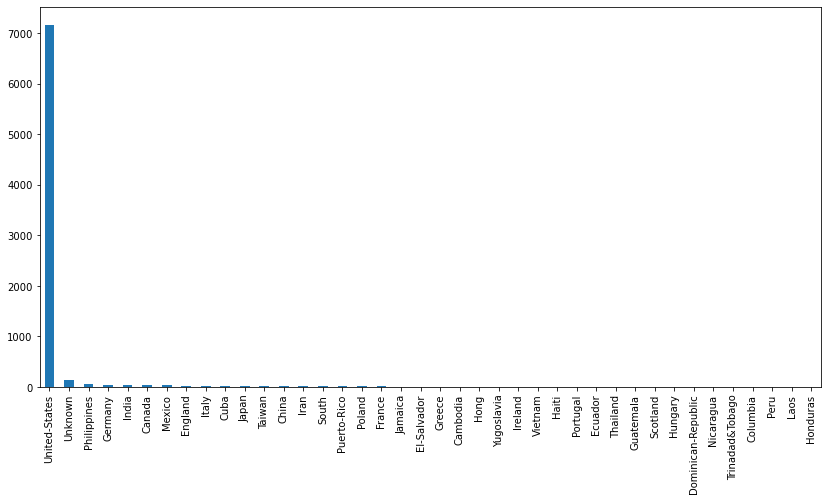

In [170]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [172]:
top_IN_occupation = (df["native-country"] == "India") & (df.salary == ">50K")

In [174]:
df[top_IN_occupation]


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K,1
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K,1
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,>50K,1
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K,1
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K,1
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K,1


In [175]:
df[top_IN_occupation]["occupation"].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Sales                1
Adm-clerical         1
Transport-moving     1
Name: occupation, dtype: int64

In [181]:


df[top_IN_occupation]['occupation'].value_counts().index[0]



'Prof-specialty'

In [182]:
a =  df[top_IN_occupation]["occupation"].mode()[0]
a

'Prof-specialty'

In [184]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---